<a href="https://colab.research.google.com/github/awalinrizky/praktikum11/blob/main/praktikum11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import pandas as pd
import numpy as np
import matplotlib.pyplob as plt
import seaborn as sns
from sklearn.cluster import KMeans
iris = pd.read_csv('iris.csv')
iris.info()
iris[0:10]

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum11/data/Iris.csv')

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Data Preparation

In [13]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [14]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


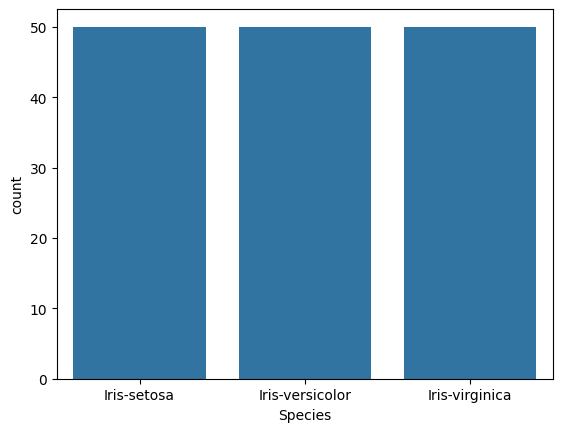

In [15]:
sns.countplot(x='Species', data=df)
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

In [21]:
X = df.drop(["Id","Species", "SpeciesEncoded"], axis=1)

In [24]:
X[7:14]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1
10,5.4,3.7,1.5,0.2
11,4.8,3.4,1.6,0.2
12,4.8,3.0,1.4,0.1
13,4.3,3.0,1.1,0.1


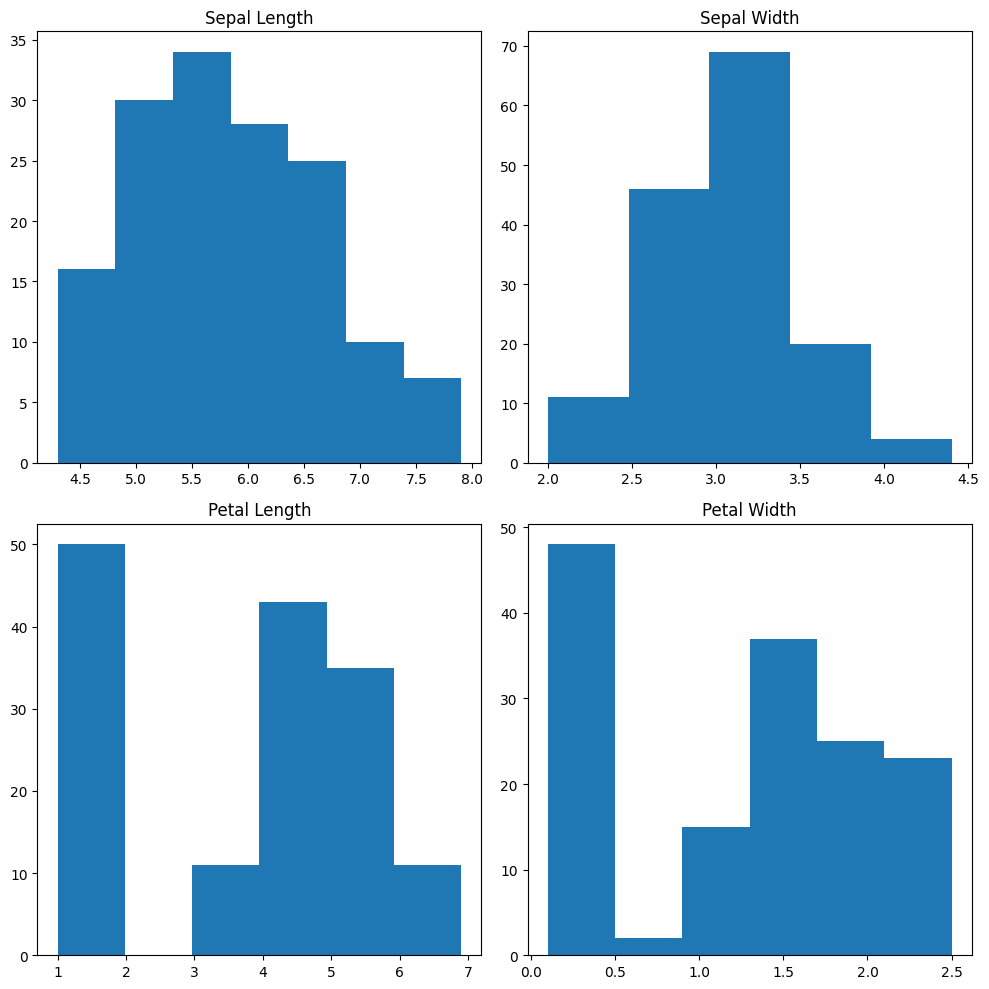

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Histogram 1 : Sepal Length
axes[0, 0].set_title("Sepal Length")
axes[0, 0].hist(X['SepalLengthCm'], bins=7)

# Histogram 2 : Sepal Width
axes[0, 1].set_title("Sepal Width")
axes[0, 1].hist(X['SepalWidthCm'], bins=5)

# Histogram 3: Petal length
axes[1, 0].set_title("Petal Length")
axes[1, 0].hist(X['PetalLengthCm'], bins=6)

# Histogram 4: Petal Width
axes[1, 1].set_title("Petal Width")
axes[1, 1].hist(X['PetalWidthCm'], bins=6)

plt.tight_layout()
plt.show()



# Normalisasi Data

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

# Now
X = scaler.fit_transform(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

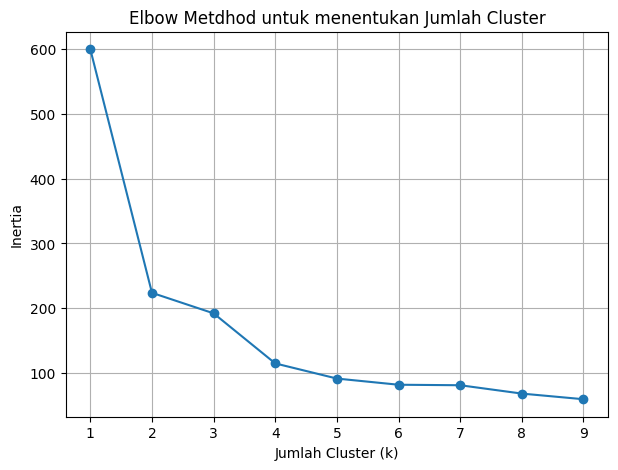

In [29]:
inertia_list = []
K_range = range(1, 10)

for k in K_range:
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(X)
  inertia_list.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K_range, inertia_list, marker='o')
plt.title("Elbow Metdhod untuk menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [30]:
kmeans = KMeans(n_clusters=3,           # Karena dataset iris ada 3 spesies
                init="k-means++",
                random_state=42
  )

In [37]:
# 1. Latih model (menentukan centroid + proses clustering)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [38]:
labels = kmeans.predict(X)

In [41]:
df["Cluster"] = labels

In [42]:
print("cluster ditemukan:", df["Cluster"].unique())


cluster ditemukan: [1 2 0]


# Silhouette Score

In [43]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, df["Cluster"])
print("\n----- SILHOUETTE SCORE -----")
print("Silhouette Score:", sil_score)


----- SILHOUETTE SCORE -----
Silhouette Score: 0.4787241921049546
